 # Create a Headline
Create a new cell.  
Put the cursor in the new cell.  
Press Esc key.   
Press m key.  
Write your comment.  
Press shift+Enter keys. 


# Load MNIST Data


In [1]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

# MNIST Data Format

In [3]:
print(train_images.shape)
print(len(train_images))
print(train_images.ndim)

(60000, 28, 28)
60000
3


In [4]:
print(test_images.shape)
print(len(test_images))
print(test_images.ndim)

(10000, 28, 28)
10000
3


In [5]:
print(train_labels.shape)

(60000,)


In [6]:
#test_images[0]   # 28x28 digits in grey level 0-255

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
print('test_images.shape:{}'.format(test_images.shape))
print('test_labels.ndim:{}'.format(test_images.ndim))
print('len(test_images):{}'.format(len(test_images)))

test_images.shape:(10000, 28, 28)
test_labels.ndim:3
len(test_images):10000


In [9]:
#print('test_image_sample  {}'.format(test_images[0]))
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#  Plot the Digits

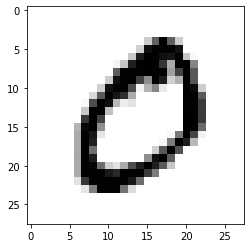

[5 0 4 1 9 2 1 3 1 4]


In [10]:
digit = train_images[1]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[0:10])

# Prepare the Images

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print('train_images.shape: {}'.format(train_images.shape))
print('train_images.ndim: {}'.format(train_images.ndim))

train_images.shape: (60000, 784)
train_images.ndim: 2


# Prepare the Labels

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)  # Convert labels to 1-hot
test_labels = to_categorical(test_labels)    # Convert labels to 1-hot
print('train_labels.shape: {}'.format(train_labels.shape))
print('train_labels.ndim {}'.format(train_labels.ndim))
print(train_labels[0])

train_labels.shape: (60000, 10)
train_labels.ndim 2
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# The Network Architecture

In [63]:
from keras import models
from keras import layers
from tensorflow.keras import initializers
from keras import regularizers
from keras.optimizers import Adam

network = models.Sequential() # Specify layers in their sequential order
# inputs are vectors in R^28*28 = R^784
# Dense = Fully Connected.  
# Hidden layer has 512 neurons with ReLU activations.
network.add(layers.Dense(512, kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.001),
                        activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
# network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) # sigmoid 
# Ouput layer uses softmax with 10 ouput neurons
# Assume there are 512 neurons going into the output layer
network.add(layers.Dense(10, kernel_initializer='glorot_normal', activation='softmax')) # sigmoid relu

# Compile the Network

In [64]:
network.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# Options for  optimizer = 'adam', 'sgd'
# Other Options loss = 'mean_squared_error' or 'mse'

# Train the Network

In [65]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 11s 187us/step - loss: 1.3207 - acc: 0.7674
Epoch 2/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.7226 - acc: 0.8919
Epoch 3/5
60000/60000 [==============================] - 11s 180us/step - loss: 0.5905 - acc: 0.91140s - loss: 0.5909 - acc: 0.911
Epoch 4/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.5159 - acc: 0.9223
Epoch 5/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.4598 - acc: 0.92901s - loss: 0.4638 - acc: 0.92 - ETA: 1s - loss: 


**Original Results (Kept for comparison purposes)**

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#  "fit" refers to fitting the network weights to the data

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 4s 66us/step - loss: 0.2717 - acc: 0.9231
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1069 - acc: 0.9685
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0693 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0503 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.0354 - acc: 0.9898


# Check Accuracy on Test Data

In [66]:
network.evaluate(np.array(test_images), np.array(test_labels), batch_size=len(test_images))

10000/10000 [==============================] - 1s 78us/step


[0.39830899238586426, 0.9433000087738037]

**Original Results (Kept for comparison purposes)**

In [15]:
network.evaluate(np.array(test_images), np.array(test_labels), batch_size=len(test_images))

10000/10000 [==============================] - 0s 7us/step


[0.06611276417970657, 0.9800000190734863]